In [1]:
import os 
import glob 
import tempfile 

import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
import MDAnalysis as mda 
from MDAnalysis.analysis import rms
from MDAnalysis.analysis import align

In [3]:
runs = sorted(glob.glob('../../protein_only/omm_runs_*'))

In [4]:
run_labels = set([os.path.basename(run).split('_')[2] for run in runs])

In [5]:
run_labels

{'adrp', 'rank1579', 'rank2355', 'rank2437', 'rank941', 'rank976'}

In [6]:
rmsf_prof = {}
for label in list(run_labels): 
    pdb_file = sorted(glob.glob(f'../../protein_only/omm_runs_{label}_*/*.pdb'))[0]
    dcd_file = sorted(glob.glob(f'../../protein_only/omm_runs_{label}_*/*.dcd'))[0]
    
    mda_u = mda.Universe(pdb_file, dcd_file) 
    protein = mda_u.select_atoms("protein")
    calphas = mda_u.select_atoms("protein and name CA") 
    
    prealigner = align.AlignTraj(mda_u, mda_u, select="protein and name CA", in_memory=True).run()
    reference_coordinates = mda_u.trajectory.timeseries(asel=protein).mean(axis=1)
    reference = mda.Merge(protein).load_new(
            reference_coordinates[:, None, :], order="afc")
    
    aligner = align.AlignTraj(mda_u, reference, select="protein and name CA", in_memory=True).run()
    
    rmsfer = rms.RMSF(calphas, verbose=True).run()
    
    rmsf_prof[label] = rmsfer.rmsf

Step  2000/2000 [100.0%]
Step  2000/2000 [100.0%]
Step  2000/2000 [100.0%]
Step  2000/2000 [100.0%]
Step  2000/2000 [100.0%]
Step  2000/2000 [100.0%]


In [15]:
run ~/.mpl_set.py

In [38]:
plt.rcParams['font.family'] = 'Bitstream Vera Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

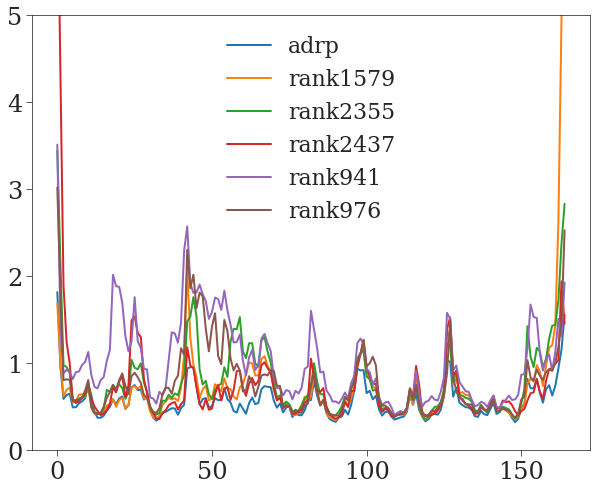

In [41]:
fig, ax = plt.subplots(figsize=(10, 8))

for label in sorted(rmsf_prof): 
    ax.plot(rmsf_prof[label], label=label)

ax.legend(loc='best')
ax.set_ylim([0, 5])

fig.savefig("rmsf_adrp.pdf", bbox_inches='tight')

In [19]:
import  matplotlib.font_manager
flist = matplotlib.font_manager.get_fontconfig_fonts()
names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
print(sorted(names))

['Bitstream Vera Sans', 'Bitstream Vera Sans', 'Bitstream Vera Sans', 'Bitstream Vera Sans', 'Bitstream Vera Sans Mono', 'Bitstream Vera Sans Mono', 'Bitstream Vera Sans Mono', 'Bitstream Vera Sans Mono', 'Bitstream Vera Serif', 'Bitstream Vera Serif', 'DejaVu Math TeX Gyre', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'Droid Sans Fallback', 'Lato', 'Lato', 'Lato', 'Lato', 'Lato', 'Lato', 'Lato', 'Lato', 'Lato', 'Lato', 'Lato', 'Lato', 'Lato', 'Lato', 'Lato', 'Lato', 'Lato', 'Lato', 'Liberation Mono', 'Liberation Mono', 'Liberation Mono', 'Liberation Mono', 'Liberation Sans', 'Liberation Sans', 'Liberation Sans', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Sans Narrow', 'Liberati

In [43]:
matplotlib.__version__

'3.2.0'